# Examples of using the data parsing tool
This notebook serves to show examples of how to use the analysis tool

All folders starting with `data` are ignored by git in this repo, so you need to make sure you have the data locally on your machine.

For more detailed documentation on how to set up the tool please refer to the `docs/` directory.

In [18]:
from src import (
    DataInterface,
    RunInfo,
    BaseTools,
    IbexCoremarkTools,
    CriticalError,
    DataCorruptionError,
    SilentError,
)

## Example 1: Quick overview

In the run configuration instantiated below all debugging options are enabled, and we have no timeout on the data-parser. The data-parser will look for the logs in the `data` directory. Direct interaction with the `runinfo` object is only really useful for debugging purposes, such as making sure you have written the config file correctly

In [19]:
runinfo = RunInfo("src/run_info/example_run_info/example_config_1.ini")

We then instantiate the `data_interface` object, which is how we interact with the data

In [20]:
data_interface = DataInterface(run_info=runinfo)

Parsin SEU logs...
  Could not read /home/anders/Git/Ibex-Analysis/data/seu_2023-09-14_17-42-14.391620/log.txt
  'utf-8' codec can't decode byte 0xcc in position 5913: invalid continuation byte
  Could not read /home/anders/Git/Ibex-Analysis/data/seu_2023-09-14_18-30-22.209335/log.txt
  'utf-8' codec can't decode byte 0xcc in position 5864: invalid continuation byte
  Could not read /home/anders/Git/Ibex-Analysis/data/seu_2023-09-14_19-04-42.402106/log.txt
  'utf-8' codec can't decode byte 0x94 in position 5706: invalid start byte
  Could not read /home/anders/Git/Ibex-Analysis/data/seu_2023-09-14_19-17-56.920649/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6059: invalid continuation byte
  Could not read /home/anders/Git/Ibex-Analysis/data/seu_2023-09-14_20-38-52.233659/log.txt
  'utf-8' codec can't decode byte 0x94 in position 5706: invalid start byte
  Could not read /home/anders/Git/Ibex-Analysis/data/seu_2023-09-14_22-16-34.457666/log.txt
  'utf-8' codec can't decode

We can see above that we enabled all debugging options. Running this in a notebook will result in some information being cut off, I therefore recommend running your analysis in a python script if you want debugging

We also see that given the data I have on my system, we have 46% of our nodes unpopulated. This means that of the nodes specified by the register list, 46% of them don't have any associated data. This set of data is quite small, so it is not unrealistic. If you have a large % of uncovered nodes, and a lot of data, make sure you specified your registers correctly

In [21]:
path = "ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top."
path += "u_ibex_top.gen_regfile_ff.register_file_i"

node = data_interface.get_node_by_path(path)
print(node.name)

node_data = data_interface.get_data_by_node(node)
node_data.head()

register_file_i


,register,register_delimiter,injection_cycle,bit_number,value_before,value_after,seed_crc,list_crc,matrix_crc,state_crc,final_crc
seu_2023-09-15_04-26-25.841410,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,94678.9,23,00000007,00800007,NaN,NaN,NaN,NaN,NaN
seu_2023-09-15_04-26-53.211829,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,306672,3,81005934,8100593c,NaN,NaN,NaN,NaN,NaN
seu_2023-09-14_17-01-11.966806,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,120344,17,00000112,00020112,NaN,NaN,NaN,NaN,NaN
seu_2023-09-14_17-01-11.974307,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,38587.5,30,8203f888,c203f888,NaN,NaN,NaN,NaN,NaN
seu_2023-09-14_17-10-08.314657,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,256332,11,0000002c,0000082c,NaN,NaN,NaN,NaN,NaN


Above we choose to query the data by the node `register_file_i`. This node is a grouping of all registers of the core, and as such when we get data on this node we get all injections on the registers of the core

Below we get the error classifications and rates of those classifications, both on the register file and on the SoC as a whole. This way we should be able to see a difference between the error rates on different parts of the SoC.

The error classification method is on the `BaseTools` class, and as such when you create a class which inherits from this you can use that. I use the class created specifically for this dataset

/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


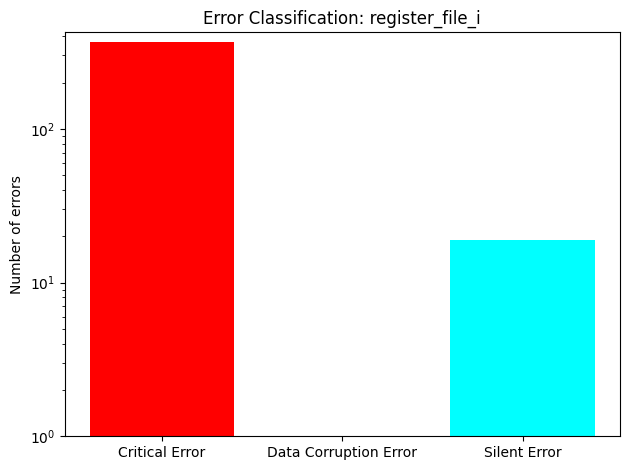

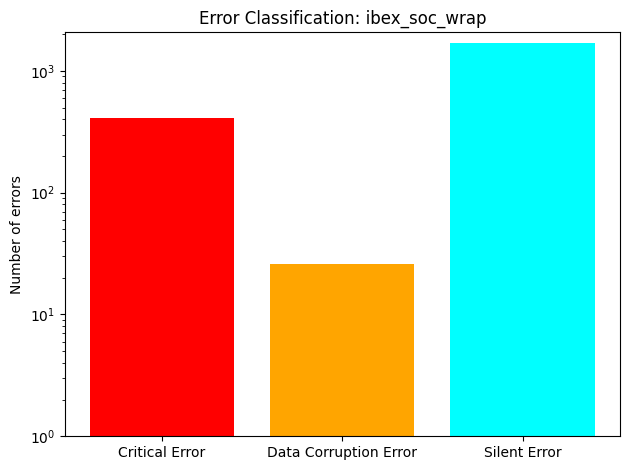

In [22]:
all_data = data_interface.get_data_by_node(data_interface.root)

node_errs, node_fig = IbexCoremarkTools.error_classification(
    node_data, data_interface.golden_log, True
)
all_errs, all_fig = IbexCoremarkTools.error_classification(
    all_data, data_interface.golden_log, True
)

Above we see that in general the register file is less resilient. The certainty of the rate estimates is not in this calculation. We will see how to get those later.

We can also get error rates over time, by using a windowing method on the `BaseTools` class. Do note that a larger window-size will result in a better resolution in the rate in a given window, but a larger window_size will also reduce the resolution in time

/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:171: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:171: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:171: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


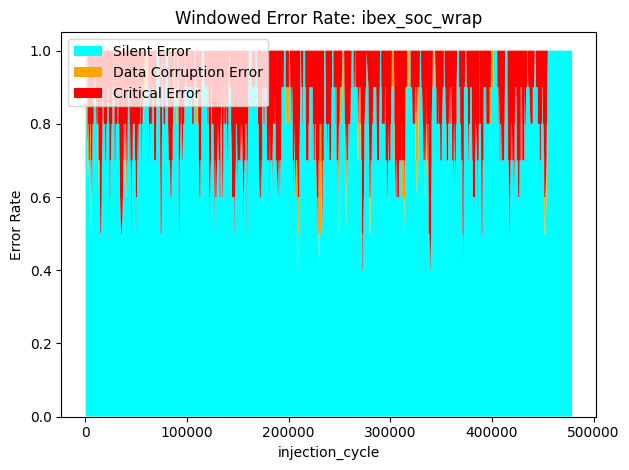

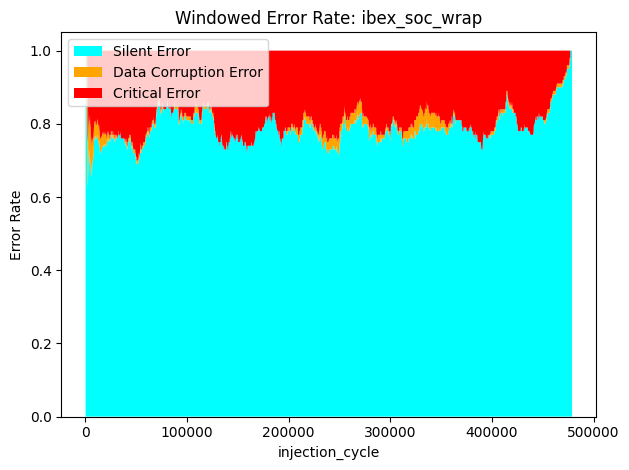

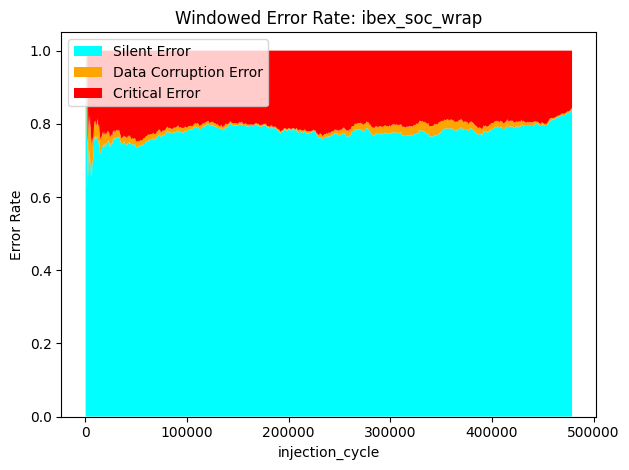

In [23]:
all_err_rate, fig = IbexCoremarkTools.windowed_error_rate(
    all_data,
    data_interface.golden_log,
    "injection_cycle",
    window_size=10, 
    visualize=True,
)

all_err_rate, fig = IbexCoremarkTools.windowed_error_rate(
    all_data,
    data_interface.golden_log,
    "injection_cycle",
    window_size=100,
    visualize=True,
)

all_err_rate, fig = IbexCoremarkTools.windowed_error_rate(
    all_data,
    data_interface.golden_log,
    "injection_cycle",
    window_size=500,
    visualize=True,
)

## Example 2: More data, more confident

This example will use config file number 2, in the same directory as in [Example 1](#example-1-quick-overview). The biggest difference between the two is that we are now working with a much larger data-set, and we are setting a timeout on the data-parsing. Note that I have also disabled all debugging in the second config file

In [24]:
runinfo = RunInfo("src/run_info/example_run_info/example_config_2.ini")
data_interface = DataInterface(runinfo)

Timed out after 40 seconds


Above we can see that the timeout more or less worked. The timeout only works specifically on reading singular logs, so it won't be hit exactly.

In [25]:
print(f"Number of parsed logs: {len(data_interface.seu_log)}")

Number of parsed logs: 79579


If we want to know how sure we can be of our estimates we can calculate the confidence intervals of these estimates. These confidence intervals will become more precise the more data we have, since they work on the principle of the central limit theorem. A good rule of thumb is to not trust the error bars with the number of samples analyzed for each error category is under 30

In [26]:
path = "ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top."
path += "u_ibex_top.gen_regfile_ff.register_file_i"

node = data_interface.get_node_by_path(path)
node_data = data_interface.get_data_by_node(node)
node_data.head()

,register,register_delimiter,injection_cycle,bit_number,value_before,value_after,seed_crc,list_crc,matrix_crc,state_crc,final_crc
seu_2023-09-16_20-12-53.564496,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,156685,27,8203fae8,8a03fae8,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-09-14_03-46-13.355172,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,196794,10,00000008,00000408,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-09-11_17-32-46.280029,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,126316,1,8203fc8c,8203fc8e,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-09-14_23-07-22.014243,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,73198,0,ffffa000,ffffa001,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-09-11_22-22-04.390255,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,379254,4,00000000,00000010,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714


When we run the code we expect to get a number of injections on the same bit at the same cycle (to understand why refer to the `docs/` directory). When we inject on a point we have already injected on we can consider that a "wasted" run. The number of wasted runs after $N$ simulations is a random variable $M$ with a distribution I have not derived. 

I have derived the variance of $M$, and the expected number of points with one or more "wasted runs" $M^*$

In [27]:
n_bits = 5600
n_cycles = 40_000
n1_runs = 1_000
n2_runs = 10_000
n3_runs = 100_000
n_runs = [n1_runs, n2_runs, n3_runs]

Es = list()
Vs = list()

for N in n_runs:
    expected_n_multi_inject_runs = IbexCoremarkTools.expected_num_multi_injection_runs(
        n_injection_cycles=n_cycles, n_target_bits=n_bits, n_runs=N
    )
    variance_n_wasted_runs = IbexCoremarkTools.variance_num_multi_injection_runs(
        n_target_bits=n_bits, n_runs=N, n_injection_cycles=n_cycles
    )
    
    Es.append(expected_n_multi_inject_runs)
    Vs.append(variance_n_wasted_runs)

for N, e, v in zip(n_runs, Es, Vs):
    print(f"N={N} => E[M*]={e:.2e}, Var[M]={v:.2e}")

N=1000 => E[M*]=2.23e-03, Var[M]=2.23e-06
N=10000 => E[M*]=2.23e-01, Var[M]=2.23e-05
N=100000 => E[M*]=2.23e+01, Var[M]=2.23e-04


Below we'll have a look at how confident we can be of our results. In Bayesian terms the confidence is the probability that the true parameter of the system (say the critical error rate in this case) is within the interval. Since we're using frequntist statistics we say that we have 95% confidence that the true parameter of the system is within the interval (if you choose to interpret it that way I won't tell the mathematicians).

/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:282: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:282: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()



Node Confidence interval:
Critical Error           0.002171
Data Corruption Error    0.002498
Silent Error             0.003040
dtype: float64


All Confidence interval:
Critical Error           0.000576
Data Corruption Error    0.000586
Silent Error             0.000804
dtype: float64



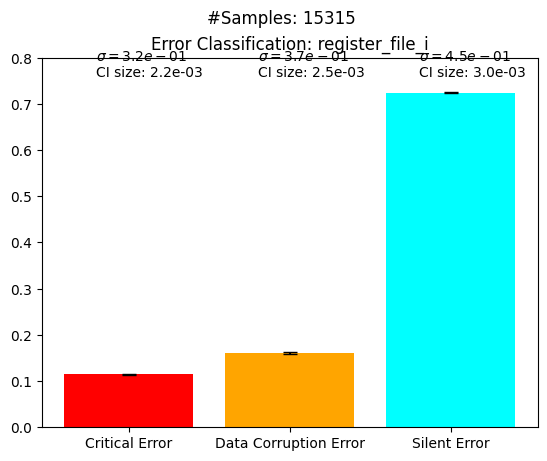

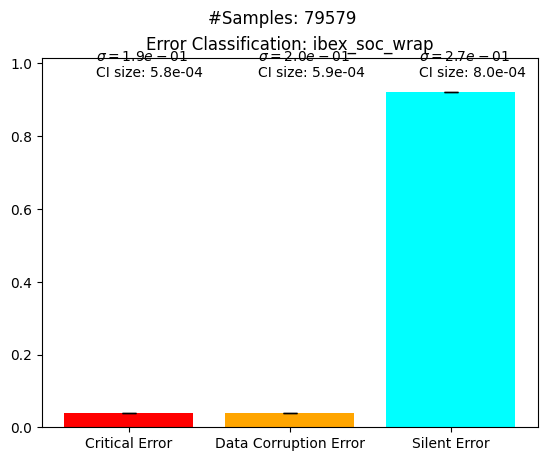

In [47]:
node_ci, fig = IbexCoremarkTools.error_classification_confidence(
    node_data,
    data_interface.golden_log,
    confidence=0.8,
    visualize=True,
)

all_ci, fig = IbexCoremarkTools.error_classification_confidence(
    data_interface.get_data_by_node(data_interface.root),
    data_interface.golden_log,
    confidence=0.8,
    visualize=True,
)

print(f"\nNode Confidence interval:\n{node_ci}\n")
print(f"\nAll Confidence interval:\n{all_ci}\n")

We see above that the confidence intervals above are of drastically different sizes

In [49]:
print(node_ci / all_ci)

Critical Error           3.769879
Data Corruption Error    4.263260
Silent Error             3.778511
dtype: float64


In fact, we see that the size of the confidence intervals on the single node are multiple times larger than those of the entire SoC. This makes sense since the variance of our estimates decrease with an increasing number of samples.

Making the confidence level much larger will also result in a larger interval

/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:282: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Critical Error           4.418872
Data Corruption Error    4.418872
Silent Error             4.418872
dtype: float64


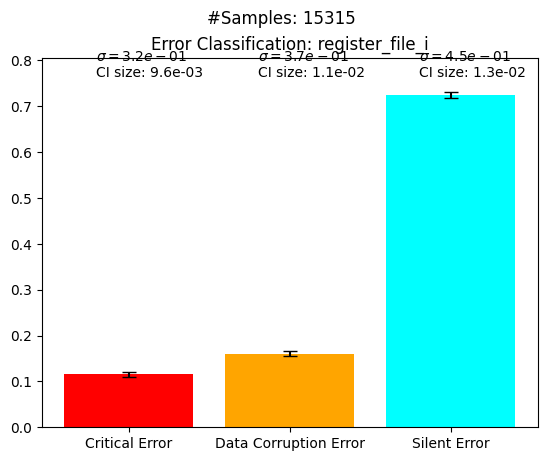

In [50]:
_node_ci, fig = IbexCoremarkTools.error_classification_confidence(
    node_data,
    data_interface.golden_log,
    confidence=0.9999,
    visualize=True,
)
print(_node_ci / node_ci)

This change is due to the fact that there is an inverse relationship between the confidence level, and the size of the confidence interval.

If you want to be more sure of where your parameter is, use a higher confidence level, but beware that more runs are needed to get a similarly small confidence interval

## Example 3

In this example we change the config-file to reflect how one would change the config file to fit a new type of log file